# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

import logging

import arviz as az
import pandas as pd
import xarray as xr
import pymc as pm
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import preliz as pz

In [ ]:
import notes.MSML610.tutorial_msml610.msml610_utils as ut

ut.config_notebook()

# Gaussianity test

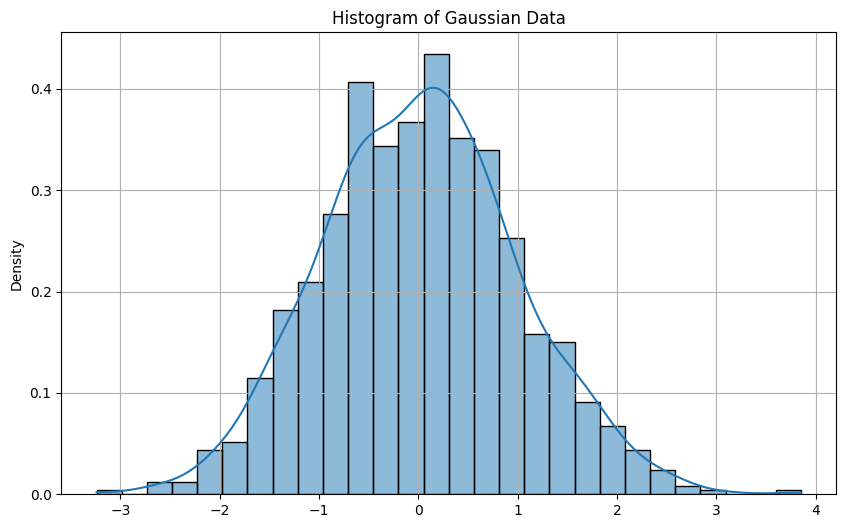

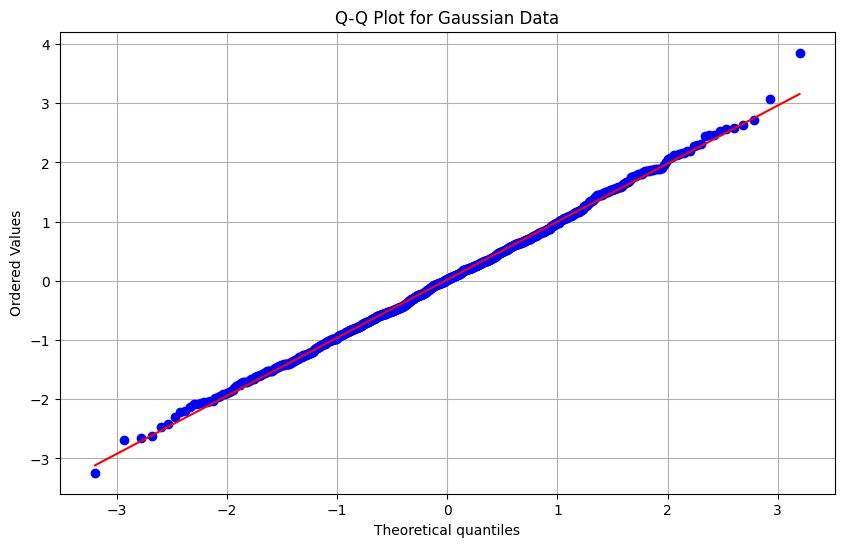

Jarque-Bera Test for Gaussian Data:
SciPy JB Statistic: 2.456373
SciPy p-value: 0.292823
Statsmodels JB Statistic: 2.456373
Statsmodels p-value: 0.292823
Skewness: 0.116801
Kurtosis: 3.066206

Hypothesis test (α = 0.05):
Fail to reject H₀: Data appears to be from a normal distribution


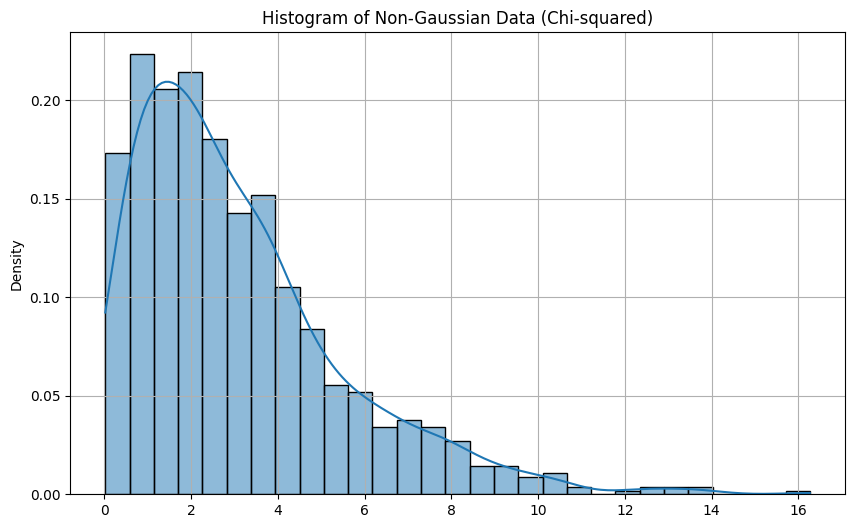

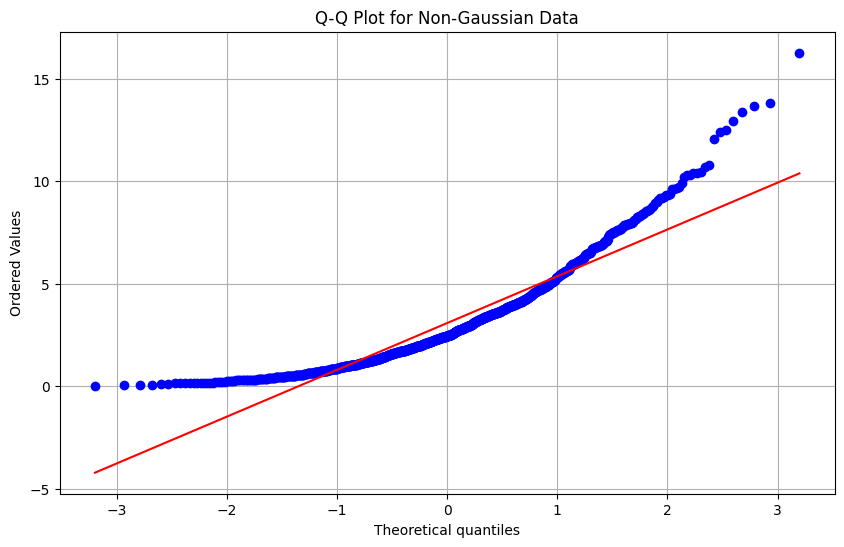


Jarque-Bera Test for Non-Gaussian Data:
JB Statistic: 599.427722
p-value: 0.000000
Skewness: 1.411631
Kurtosis: 5.532874

Hypothesis test (α = 0.05):
Reject H₀: Data does not appear to be from a normal distribution


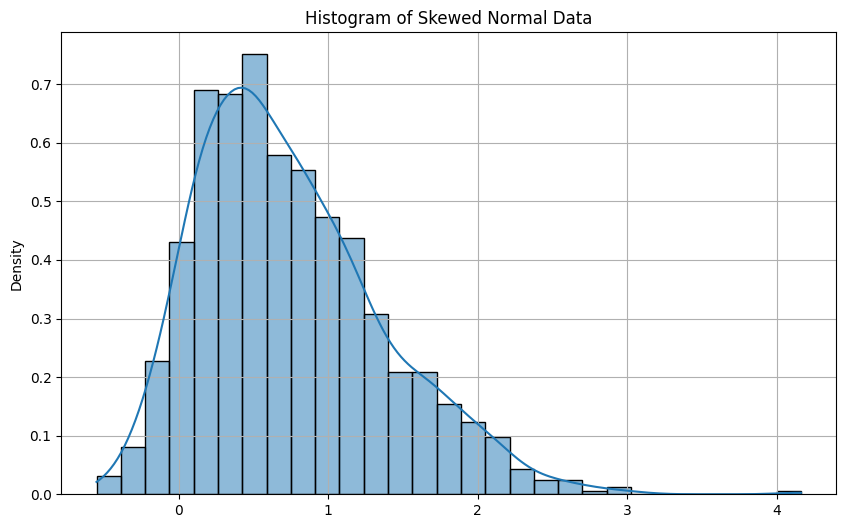

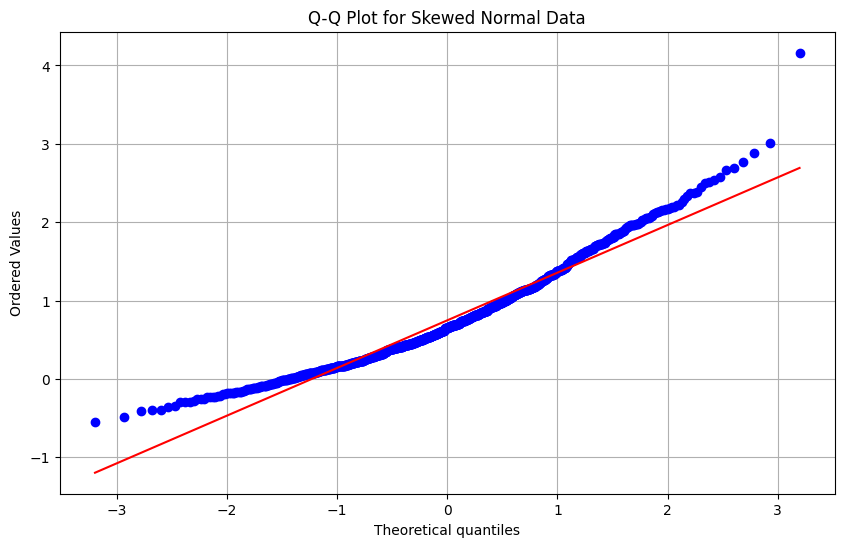


Jarque-Bera Test for Skewed Normal Data:
JB Statistic: 157.494221
p-value: 0.000000
Skewness: 0.848176
Kurtosis: 3.949868

Hypothesis test (α = 0.05):
Reject H₀: Data does not appear to be from a normal distribution


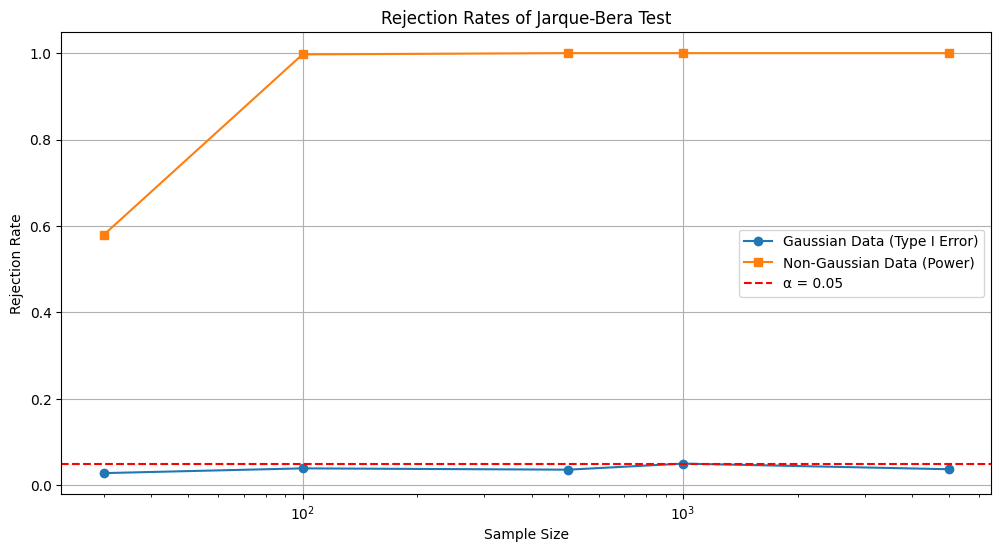

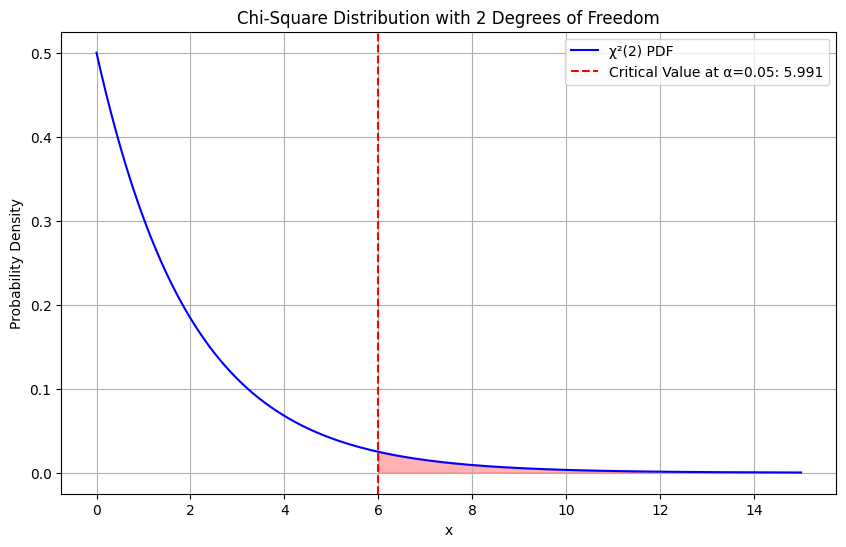


Comparison of JB Calculation Methods:
Gaussian Data - Manual: 2.456373, SciPy: 2.456373
Non-Gaussian Data - Manual: 599.427722, SciPy: 599.427722
Skewed Data - Manual: 157.494221, SciPy: 157.494221

Summary of Gaussianity Tests:
                    Data Type  JB Statistic        p-value  Skewness  \
0                    Gaussian      2.456373   2.928231e-01  0.116801   
1  Non-Gaussian (Chi-squared)    599.427722  6.853685e-131  1.411631   
2               Skewed Normal    157.494221   6.317779e-35  0.848176   

   Kurtosis         Conclusion  
0  3.066206  Fail to reject H₀  
1  5.532874          Reject H₀  
2  3.949868          Reject H₀  

Other Normality Tests from SciPy:

Shapiro-Wilk Test:
Gaussian Data: ShapiroResult(statistic=0.9986092190571166, pvalue=0.6272578290249117)
Non-Gaussian Data: ShapiroResult(statistic=0.8874137825662062, pvalue=2.3720384694518948e-26)
Skewed Data: ShapiroResult(statistic=0.9571670999662301, pvalue=1.631610051647425e-16)

D'Agostino and Pearson's T

In [1]:
# Gaussianity Testing: Hypothesis Testing with Jarque-Bera Test

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate Gaussian data
n_samples = 1000
gaussian_data = np.random.normal(loc=0, scale=1, size=n_samples)

# Plot histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(gaussian_data, kde=True, stat="density")
plt.title('Histogram of Gaussian Data')
plt.grid(True)
plt.show()

# Create QQ plot for Gaussian data using scipy.stats
plt.figure(figsize=(10, 6))
stats.probplot(gaussian_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Gaussian Data")
plt.grid(True)
plt.show()

# Calculate skewness and kurtosis using scipy.stats
skewness_gaussian = stats.skew(gaussian_data)
kurtosis_gaussian = stats.kurtosis(gaussian_data, fisher=False)  # Non-excess kurtosis

# Perform Jarque-Bera test using scipy.stats
jb_stat_gaussian, jb_pvalue_gaussian = stats.jarque_bera(gaussian_data)

# Also use statsmodels for verification
jb_stats_sm, jb_pvalue_sm, skew_sm, kurt_sm = jarque_bera(gaussian_data)

print("Jarque-Bera Test for Gaussian Data:")
print(f"SciPy JB Statistic: {jb_stat_gaussian:.6f}")
print(f"SciPy p-value: {jb_pvalue_gaussian:.6f}")
print(f"Statsmodels JB Statistic: {jb_stats_sm:.6f}")
print(f"Statsmodels p-value: {jb_pvalue_sm:.6f}")
print(f"Skewness: {skewness_gaussian:.6f}")
print(f"Kurtosis: {kurtosis_gaussian:.6f}")

# Set alpha level for hypothesis test
alpha = 0.05
print(f"\nHypothesis test (α = {alpha}):")
if jb_pvalue_gaussian > alpha:
    print("Fail to reject H₀: Data appears to be from a normal distribution")
else:
    print("Reject H₀: Data does not appear to be from a normal distribution")

# Generate non-Gaussian data (chi-squared distribution with 3 degrees of freedom)
non_gaussian_data = np.random.chisquare(df=3, size=n_samples)

# Plot histogram with density curve for non-Gaussian data
plt.figure(figsize=(10, 6))
sns.histplot(non_gaussian_data, kde=True, stat="density")
plt.title('Histogram of Non-Gaussian Data (Chi-squared)')
plt.grid(True)
plt.show()

# Create QQ plot for non-Gaussian data
plt.figure(figsize=(10, 6))
stats.probplot(non_gaussian_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Non-Gaussian Data")
plt.grid(True)
plt.show()

# Calculate skewness and kurtosis for non-Gaussian data
skewness_non_gaussian = stats.skew(non_gaussian_data)
kurtosis_non_gaussian = stats.kurtosis(non_gaussian_data, fisher=False)

# Perform Jarque-Bera test for non-Gaussian data
jb_stat_non_gaussian, jb_pvalue_non_gaussian = stats.jarque_bera(non_gaussian_data)

print("\nJarque-Bera Test for Non-Gaussian Data:")
print(f"JB Statistic: {jb_stat_non_gaussian:.6f}")
print(f"p-value: {jb_pvalue_non_gaussian:.6f}")
print(f"Skewness: {skewness_non_gaussian:.6f}")
print(f"Kurtosis: {kurtosis_non_gaussian:.6f}")

print(f"\nHypothesis test (α = {alpha}):")
if jb_pvalue_non_gaussian > alpha:
    print("Fail to reject H₀: Data appears to be from a normal distribution")
else:
    print("Reject H₀: Data does not appear to be from a normal distribution")

# Generate skewed normal data using scipy.stats
skewed_data = stats.skewnorm.rvs(a=4, loc=0, scale=1, size=n_samples, random_state=42)

# Plot histogram with density curve for skewed data
plt.figure(figsize=(10, 6))
sns.histplot(skewed_data, kde=True, stat="density")
plt.title('Histogram of Skewed Normal Data')
plt.grid(True)
plt.show()

# Create QQ plot for skewed data
plt.figure(figsize=(10, 6))
stats.probplot(skewed_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Skewed Normal Data")
plt.grid(True)
plt.show()

# Calculate statistics for skewed data
skewness_skewed = stats.skew(skewed_data)
kurtosis_skewed = stats.kurtosis(skewed_data, fisher=False)
jb_stat_skewed, jb_pvalue_skewed = stats.jarque_bera(skewed_data)

print("\nJarque-Bera Test for Skewed Normal Data:")
print(f"JB Statistic: {jb_stat_skewed:.6f}")
print(f"p-value: {jb_pvalue_skewed:.6f}")
print(f"Skewness: {skewness_skewed:.6f}")
print(f"Kurtosis: {kurtosis_skewed:.6f}")

print(f"\nHypothesis test (α = {alpha}):")
if jb_pvalue_skewed > alpha:
    print("Fail to reject H₀: Data appears to be from a normal distribution")
else:
    print("Reject H₀: Data does not appear to be from a normal distribution")

# Demonstrate how the Jarque-Bera test behaves with different sample sizes
sample_sizes = [30, 100, 500, 1000, 5000]
rejection_rates_gaussian = []
rejection_rates_non_gaussian = []

# Number of simulation trials
num_trials = 1000

# Use NumPy's random generator for better performance
rng = np.random.RandomState(42)

for n in sample_sizes:
    # Track how many times we reject H0 for Gaussian data (Type I error)
    reject_count_gaussian = 0
    # Track how many times we reject H0 for non-Gaussian data (Power)
    reject_count_non_gaussian = 0
    
    for _ in range(num_trials):
        # Generate Gaussian data
        gauss_data = rng.normal(loc=0, scale=1, size=n)
        # Calculate JB test using scipy
        _, p_value = stats.jarque_bera(gauss_data)
        if p_value < alpha:
            reject_count_gaussian += 1
        
        # Generate non-Gaussian data (chi-squared)
        non_gauss_data = rng.chisquare(df=3, size=n)
        # Calculate JB test using scipy
        _, p_value = stats.jarque_bera(non_gauss_data)
        if p_value < alpha:
            reject_count_non_gaussian += 1
    
    # Calculate rejection rates
    rejection_rates_gaussian.append(reject_count_gaussian / num_trials)
    rejection_rates_non_gaussian.append(reject_count_non_gaussian / num_trials)

# Plot rejection rates
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, rejection_rates_gaussian, 'o-', label='Gaussian Data (Type I Error)')
plt.plot(sample_sizes, rejection_rates_non_gaussian, 's-', label='Non-Gaussian Data (Power)')
plt.axhline(y=alpha, color='r', linestyle='--', label=f'α = {alpha}')
plt.xlabel('Sample Size')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates of Jarque-Bera Test')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

# Visualize the chi-square critical value
x = np.linspace(0, 15, 1000)
chi2_pdf = stats.chi2.pdf(x, df=2)
critical_value = stats.chi2.ppf(0.95, df=2)

plt.figure(figsize=(10, 6))
plt.plot(x, chi2_pdf, 'b-', label='χ²(2) PDF')
plt.fill_between(x, chi2_pdf, where=(x > critical_value), alpha=0.3, color='r')
plt.axvline(x=critical_value, color='r', linestyle='--', 
            label=f'Critical Value at α=0.05: {critical_value:.3f}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution with 2 Degrees of Freedom')
plt.legend()
plt.grid(True)
plt.show()

# Compare the Jarque-Bera formula from the notes with scipy implementation
# Using the first dataset as an example
def calculate_jb_manually(data):
    """Calculate JB statistic using the formula from the notes"""
    T = len(data)
    sk = stats.skew(data)
    ku = stats.kurtosis(data, fisher=False)  # Non-excess kurtosis
    jb = (T/6) * (sk**2 + ((ku - 3)**2)/4)
    return jb

# Calculate JB statistic manually
jb_manual_gaussian = calculate_jb_manually(gaussian_data)
jb_manual_non_gaussian = calculate_jb_manually(non_gaussian_data)
jb_manual_skewed = calculate_jb_manually(skewed_data)

print("\nComparison of JB Calculation Methods:")
print(f"Gaussian Data - Manual: {jb_manual_gaussian:.6f}, SciPy: {jb_stat_gaussian:.6f}")
print(f"Non-Gaussian Data - Manual: {jb_manual_non_gaussian:.6f}, SciPy: {jb_stat_non_gaussian:.6f}")
print(f"Skewed Data - Manual: {jb_manual_skewed:.6f}, SciPy: {jb_stat_skewed:.6f}")

# Summary
results_df = pd.DataFrame({
    'Data Type': ['Gaussian', 'Non-Gaussian (Chi-squared)', 'Skewed Normal'],
    'JB Statistic': [jb_stat_gaussian, jb_stat_non_gaussian, jb_stat_skewed],
    'p-value': [jb_pvalue_gaussian, jb_pvalue_non_gaussian, jb_pvalue_skewed],
    'Skewness': [skewness_gaussian, skewness_non_gaussian, skewness_skewed],
    'Kurtosis': [kurtosis_gaussian, kurtosis_non_gaussian, kurtosis_skewed],
    'Conclusion': ['Fail to reject H₀' if jb_pvalue_gaussian > alpha else 'Reject H₀',
                   'Fail to reject H₀' if jb_pvalue_non_gaussian > alpha else 'Reject H₀',
                   'Fail to reject H₀' if jb_pvalue_skewed > alpha else 'Reject H₀']
})

print("\nSummary of Gaussianity Tests:")
print(results_df)

# Additional statistics and normality tests from scipy
print("\nOther Normality Tests from SciPy:")

# Shapiro-Wilk test
print("\nShapiro-Wilk Test:")
print("Gaussian Data:", stats.shapiro(gaussian_data))
print("Non-Gaussian Data:", stats.shapiro(non_gaussian_data))
print("Skewed Data:", stats.shapiro(skewed_data))

# D'Agostino and Pearson's test
print("\nD'Agostino and Pearson's Test:")
print("Gaussian Data:", stats.normaltest(gaussian_data))
print("Non-Gaussian Data:", stats.normaltest(non_gaussian_data))
print("Skewed Data:", stats.normaltest(skewed_data))

# Kolmogorov-Smirnov test
print("\nKolmogorov-Smirnov Test:")
print("Gaussian Data:", stats.kstest(gaussian_data, 'norm'))
print("Non-Gaussian Data:", stats.kstest(non_gaussian_data, 'norm'))
print("Skewed Data:", stats.kstest(skewed_data, 'norm'))